In [1]:
# Dot Product
# Author: Zhang Su (Teaching Assistant)
# Using python3, numpy, matplotlib
# 1 June 2020

# Learning Outcome

By the end of this material, you should be able to:

+ Import and abbreviate libraries,
+ Initiate row and column vectors,
+ Calculate norm, distance, normalization and dot product using Numpy libraries and your own implementations,
+ Verify the equalities or inequalities.

Note: 
1. If you occasionally double clicked a textual cell, the display would change to markdown source code. To reverse, simply click anywhere of that markdown cell,  and then click **Run** in the top manu.
2. Sometimes the notebook may not be responding. That is caused by the failure of jupyter kernel. To repair, try clicking **Kernel** in the top manu, then clicking **Reconnect**. 
3. Section Takeaways summarizes useful tips, e.g., holes of Python to avoid, if any.
4. Section Practice reflect the learning outcomes. You are expected to solve them based on your understanding on the lecture notes alone with the coding skills learned from this demo.

# Table of contents <a name="Table_of_Content"></a>

+ 6.1.1. [Review of Vectors](#Review) 
+ 6.1.2. [Norm](#Norm) 
+ 6.1.2. [Unit Vector](#Normalization) 
+ 6.1.3. [Dot product](#Dot_product) 
+ 6.1.4. [Inequality](#Inequality) 
+ [Takeaways](#Takeaways) 
+ [Practice](#Practice)

Usually, **Numpy** is the most relevant library to our topic. For convenience, we also specify `numpy.linalg` as `la`. How do I know to use them? Because I googled. Actually, you can simply google "python norm" to find plenty of useful [documents](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) or tutorials to calculate the norm, from which I know that Numpy is the only one to include. In short, a format of "Language+Operation" or "Language+Library+Operation" is a good starting point of google search for this coding task. 

Let's import the libraries.

In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt # For visualization

### Review of Vectors<a name="Review"></a> 
[Return to Table of Content](#Table_of_Content)

**This part of code is for Section 6.1.1.**

A vector is an object that has both a length and a direction. Suppose that we have three points $O$, $P_1$, and $P_2$, we can obtain three vectors 
$$
\begin{align}
\overrightarrow{OP_1}&=P_1-O, \tag{1} \\
\overrightarrow{OP_2}&=P_2-O, \tag{2}\\
\overrightarrow{P_1P_2}&=P_2-P_1, \tag{3}
\end{align}
$$

where $\overrightarrow{P_1P_2}=\overrightarrow{OP_2}-\overrightarrow{OP_1}$. 

Let's see what Python can do to achieve this.



P1P2 =  [2 1]
OP2-OP1 =  [2 1]
Are they equal? True


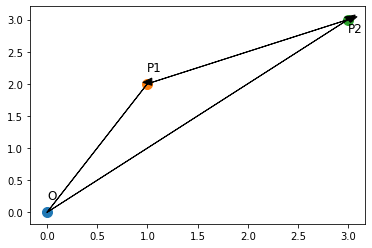

In [3]:
# Initiate the three points
O = np.array([0, 0])
P1 = np.array([1, 2])
P2 = np.array([3, 3])

# Creat the vectors
OP1 = P1 - O   # Eq. 1
OP2 = P2 - O   # Eq. 2
P1P2 = P2 - P1 # Eq. 3

# Check if P1P2 = OP2 - OP1
print("P1P2 = ", P1P2)
print("OP2-OP1 = ", OP2 - OP1)
print("Are they equal?", np.allclose(P1P2, OP2 - OP1)) # Check the element-wise equality.


######### Below is for visualization. 

# Draw the three points. s variable is the size of the marker.
plt.scatter(O[0], O[1], s=100)
plt.scatter(P1[0], P1[1], s=100)
plt.scatter(P2[0], P2[1], s=100)

# Draw the three arrow.
plt.arrow(O[0], O[1], P1[0], P1[1], head_width=0.1, head_length=0.1, fc='k', ec='k')
plt.arrow(O[0], O[1], P2[0], P2[1], head_width=0.1, head_length=0.1, fc='k', ec='k')
plt.arrow(P1[0], P1[1], P2[0] - P1[0], P2[1] - P1[1], head_width=0.1, head_length=0.1, fc='k', ec='k')

# Place the name of the points
plt.text(O[0], O[1]+0.2, 'O', fontsize=12)
plt.text(P1[0], P1[1]+0.2, 'P1', fontsize=12)
plt.text(P2[0], P2[1]-0.2, 'P2', fontsize=12)

plt.show()

In above cell we have shown how to creat vectors by the subtraction of point coordinates. Mostly in this course, the vector is already given. What matters is how to initiate the vector using `Numpy`.

In the cell below, we initiate a column vector $v$, and a row vector $u$, and two other random vectors $x$ and $y$ in $\mathbb{R}^3$. Pay attention to the double square brackets `np.array([[]])`, and the transpose `.T`.

In [4]:
u = np.array([[3,-1,-5]]).T  # Make sure that there are double square brackets.
v = np.array([[6,-2,3]])
x = np.random.rand(3,1) # Or if you wish to randomize. 
y = np.random.rand(1,3)

print('The column vector u =\n',u)
print("It's shape is ", u.shape)

print('\nThe row vector v =\n',v)
print("It's shape is ", v.shape)

print('\nThe column vector v =\n',x)
print("It's shape is ", x.shape)

print('\nThe row vector u =\n',y)
print("It's shape is ", y.shape)

The column vector u =
 [[ 3]
 [-1]
 [-5]]
It's shape is  (3, 1)

The row vector v =
 [[ 6 -2  3]]
It's shape is  (1, 3)

The column vector v =
 [[0.55951777]
 [0.65943763]
 [0.70728613]]
It's shape is  (3, 1)

The row vector u =
 [[0.47125331 0.41005891 0.4520101 ]]
It's shape is  (1, 3)


What if we use single square bracket? The cell below shows that we have lost control on the shape.

To conclude, the initialization using double square brackets follows a standard matrix notation. **Please use double square brackets!!**

In [5]:
u = np.array([3,-1,-5]).T  # Make sure that there are double square brackets.
v = np.array([6,-2,3])
# x = np.random.rand(3,1) # Or if you wish to randomize. 

print('The column vector u values =\n',u)
print("It's shape is ", u.shape)

print('\nThe row vector v values =\n',v)
print("It's shape is ", v.shape)

The column vector u values =
 [ 3 -1 -5]
It's shape is  (3,)

The row vector v values =
 [ 6 -2  3]
It's shape is  (3,)


### Norm<a name="Norm"></a> 
[Return to Table of Content](#Table_of_Content)

**This part of code is for Section 6.1.2.**

In our lecture, when we say "norm", we actually mean the l2-norm. There exists other norms, say, l1-norm, infinity norm, etc, which are out of the scope of this course. We simply stick to l2-norm in the remainder of this script.

Norm is a kind of metric. It measures the length of a vector, or the distance of two vectors, thanks to the mighty definition of **vector space**. 

The length of $u$ is written as:

$$
||u||=\sqrt{u_1u_1+u_2u_2+\ldots+u_nu_n}=\sqrt{\sum_{i=1}^nu_iu_i} \tag{4},
$$

and the distance of $u$ and $v$ is written as:

$$
||u-v||=\sqrt{(u_1-v_1)(u_1-v_1)+(u_2-v_2)(u_2-v_2)+\ldots+(u_n-v_n)(u_n-v_n)}=\sqrt{\sum_{i=1}^n(u_i-v_i)(u_i-v_i)} \tag{5}.
$$

Let's implement a function to calculate the norm following Eq. (4). To do so, we may simply google "numpy iterating over arrays", and we can find many useful tutorials, like [this one](https://numpy.org/doc/stable/reference/arrays.nditer.html).

In [6]:
def my_norm(u):
# The manual implementation of norm
# Input: a column or row vector u
# Output: the norm of u
    
    # Sanity check.
    # Make sure that u is a column or row vector
    assert min(u.shape[0], u.shape[1]) == 1
    
    # Eq. 4
    norm = 0
    for ui in np.nditer(u):
        norm += ui*ui
    
    return np.sqrt(norm)


u = np.array([[3,-1,-5]]).T  # Make sure that there are double square brackets.
v = np.array([[6,-2,3]]).T

norm_u = la.norm(u) 
norm_v = la.norm(v) 

my_norm_u = my_norm(u) # Eq. 4
my_norm_v = my_norm(v) # Eq. 4

print('Numpy norm of u  =\n', norm_u)
print('My own norm of u  =\n', my_norm_u)
print('Numpy norm of v  =\n', norm_v)
print('My own norm of v  =\n', my_norm_v)

Numpy norm of u  =
 5.916079783099616
My own norm of u  =
 5.916079783099616
Numpy norm of v  =
 7.0
My own norm of v  =
 7.0


In [7]:
dist_uv = la.norm(u-v) # Eq. 5

print('The distance of u and v =\n',dist_uv)

The distance of u and v =
 8.602325267042627


### Unit Vector<a name="Normalization"></a>
[Return to Table of Content](#Table_of_Content)

**This part of code is for Section 6.1.2.**

To obtain a unit vector, the normalization is required. The normalization of $u$ is written as:

$$
u_{unit}=\frac{u}{||u||}, \tag{6}
$$

where $u_{unit}$ is a unit vector.

`numpy` has no method for normalize a vector to unit length. Therefore we have to to manually implement it following the formula.

In [8]:
# Eq. 6
unit_u = u / norm_u
unit_v = v / norm_v

print('The normalized u =\n {},\n its length ={}'.format(unit_u, la.norm(unit_u)))
print('Unit vector?', np.allclose(la.norm(unit_u), 1))
print('\n')

print('The normalized v =\n {},\n its length ={}'.format(unit_v, la.norm(unit_v)))
print('Unit vector?', np.allclose(la.norm(unit_v), 1))

The normalized u =
 [[ 0.50709255]
 [-0.16903085]
 [-0.84515425]],
 its length =1.0
Unit vector? True


The normalized v =
 [[ 0.85714286]
 [-0.28571429]
 [ 0.42857143]],
 its length =0.9999999999999999
Unit vector? True


### Dot product<a name="Dot_product"></a>
[Return to Table of Content](#Table_of_Content)

**This part of code is for Section 6.1.3.**

The dot product of $w$ and $x$ is written as:

$$
u\cdot v = u_1v_1+u_2v_2+\ldots+u_nv_n=\sum_{i=1}^nu_iv_i. \tag{7}
$$

There are several equivalent ways to calculate the dot product in Python.

`np.dot` usually works in a matrix operation manner. Therefore we have to carefully shape the vectors to match the dimension requirement. In our example, `u` and `v` are all $3\times 1$ dimensional. The mutiplication of two $3\times 1$ matrices doesn't make sense. We have to transpose one of them so that an $1\times 1$ matrix ($1\times 3$ by $3\times 1$) or $3\times 3$ matrix ($3\times 1$ by $1\times 3$) can be obtained. The former is also called **inner product**, which is exactly covered by our course. (The latter is called **outer product** if you would like to know :)

`np.multiply` works on any two vectors or matrices with the same dimension. In our example, two $3\times 1$ vectors will be fine. Compared to `np.dot`, we do not need to transpose, but have to sum the elements after the element-wise multiplication.

And, if you are sure that the two variables have the same dimension, you may simply use `*` operator. However, a scalar  can also multiply with a vector obtaining another vector, e.g., `3 * [1,2,3] = [3,6,9]`, which may cause unexpected bug.

Run the following cell and see the results. The outputs have the same value but different data shapes. (**We will mostly use the first method in our course.**)

In [9]:
# Three equivalent for Eq. 7
dot_uv = u.T.dot(v) # Be careful for the transpose. Here we transpose u so that a scalar can be obtained.
dot_uv_2 = np.multiply(u,v).sum()
dot_uv_3 = (u * v).sum() # This one is dangerous.

print('The dot product of u and v =\n',dot_uv)
print('The dot product of u and v =\n',dot_uv_2)
print('The dot product of u and v =\n',dot_uv_3)

The dot product of u and v =
 [[5]]
The dot product of u and v =
 5
The dot product of u and v =
 5


### Inequality<a name="Inequality"></a>
[Return to Table of Content](#Table_of_Content)

**This part of code is for Section 6.1.4.**

There are two inequalities and one equation in this section, the Cauchy-Schwarz, the triangle and the parallelogram equation.

We can simply verify them using random vectors in Python.

#### Cosine and Cauchy-Schwarz Inequality


The Cauchy-Schwarz Inequality is strongly relevant to the cosine formula as below.

$$
-1\leq\cos(\theta)=\frac{u\cdot v}{||u||\cdot||v||}\leq 1, \tag{8}
$$

where $\theta$ is the angle between vector $u$ and $v$.

The cosine, ranged in [-1,+1] can be taken as a continuous measure of **similarity**. The larger the cosine is, the more similar the two vectors are.

There are two ways to calculate the cosine, depending on whether the vectors are unit or not.

In [10]:
# Initiate the vectors, calculate the norm and carry out normalization.
u = np.random.rand(3,1)
v = np.random.rand(3,1)

norm_u = la.norm(u)
norm_v = la.norm(v)

unit_u = u / norm_u
unit_v = v / norm_v

# Eq. 8
# If not unit vector
cos_uv = np.dot(u.T, v/(norm_u * norm_v))
# If unit vector
cos_uv_2 = unit_u.T.dot(unit_v)


print('The cosine of u and v =\n',cos_uv)
print('The cosine of u and v =\n',cos_uv_2)
print('Are they equal?', np.allclose(cos_uv, cos_uv_2))

The cosine of u and v =
 [[0.91698982]]
The cosine of u and v =
 [[0.91698982]]
Are they equal? True


Let's check the inequality, i.e.:

$$
\begin{equation}
\|u\cdot v\|\leq\|u\|\|v\|. \tag{9}
\end{equation}
$$

In [11]:
u = np.random.rand(3,1)
v = np.random.rand(3,1)

# Eq. 9
left_hand_side = la.norm(u.dot(v.T))
right_hand_side = la.norm(u) * la.norm(v) # We can safely use * operator since the norm is always a scalar.

print("Less than or equal to?", left_hand_side <= right_hand_side)

Less than or equal to? True


#### Triangle Inequality

For the triangle inequality, let's check the following inequalities:

$$
\begin{equation}
\|u + v\|\leq\|u\|+\|v\|. \tag{10}
\end{equation}
$$

$$
\begin{equation}
d(u, v)\leq d(u, w)+d(w, v). \tag{11}
\end{equation}
$$

In [12]:
u = np.random.rand(3,1)
v = np.random.rand(3,1)
w = np.random.rand(3,1)

# Eq. 10
left_hand_side = la.norm(u + v)
right_hand_side = la.norm(u) + la.norm(v)
print("Less than or equal to?", left_hand_side <= right_hand_side)

# Eq. 11
left_hand_side = la.norm(u - v)
right_hand_side = la.norm(u - w) + la.norm(w - v)
print("Less than or equal to?", left_hand_side <= right_hand_side)

Less than or equal to? True
Less than or equal to? True


#### Parallelogram Equation

For the parallelogram equation, let's check the following equalities:

$$
\begin{equation}
\|u + v\|^2+\|u - v\|^2=2(\|u\|^2+\|v\|^2). \tag{12}
\end{equation}
$$

$$
\begin{equation}
u\cdot v = \frac{1}{4}\|u + v\|^2 - \frac{1}{4}\|u - v\|^2. \tag{13}
\end{equation}
$$


In [13]:
u = np.random.rand(3,1)
v = np.random.rand(3,1)

# Eq. 12
left_hand_side = la.norm(u + v) ** 2 + la.norm(u - v) ** 2
right_hand_side = 2 * (la.norm(u) ** 2 + la.norm(v) ** 2)
print("Are the both sides of Eq. 12 equal?", np.isclose(left_hand_side,right_hand_side))

# Eq. 13 is left for practice.
# :)

Are the both sides of Eq. 12 equal? True


### Takeaways<a name="Takeaways"></a>
[Return to Table of Content](#Table_of_Content)


1. Utilize google wisely! Though the TA works hard to make everything clear, the demo may still inevitably overlook something and confuse you. In this case, you are strongly to abstract your problem and google it. 
2. The dimension, or shape in a friendlier form, is extremely crucial throughout all the Python files. Sometimes the program may produce unexpected results without errors. You may use `.shape` method to verify a numpy ndarray, or use `assert` command as we did in `my_norm()`, to guarantee the correctness.
3. Use double square brackets to initiate a vector, so that it follows and preserves a standard matrix notation.
4. use `numpy.allclose` or `numpy.isclose` to verify the equality of two vectors/matrices or scalars, respectively.

### Practice<a name="Practice"></a>
[Return to Table of Content](#Table_of_Content)

**This part can get you ready for the lab!**

1. Initiate three column vectors $u$, $v$ and $w$ in $\mathbb{R}^5$, one by hand-craft, and the rest by randomization.
2. Implement your own routines to calculate distance, dot product, unit vectors, and cosine following Eq. 5, 6, 7, and 8, respectively.
2. Compute their norms, dot products, and corresponding unit vectors using your own implementation, and compare your result against Numpy routines.
3. What's the advantage of unit vectors compared to their vanilla counterpart before the normalization?
4. Of $u$ and $v$, which one is more similar to $w$? Why?
5. Verify that $u$ and $v$ obey Eq. 13. 